In [22]:
#importing the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans


In [2]:
#creating a pandas DataFrame from a CSV file
data = pd.read_csv("weather.zip",compression = 'zip')
print("Data shape:",data.shape)
print("Sample Data:\n",data.head())

Data shape: (1587257, 13)
Sample Data:
    rowID     hpwren_timestamp  air_pressure  air_temp  avg_wind_direction  \
0      0  2011-09-10 00:00:49         912.3     64.76                97.0   
1      1  2011-09-10 00:01:49         912.3     63.86               161.0   
2      2  2011-09-10 00:02:49         912.3     64.22                77.0   
3      3  2011-09-10 00:03:49         912.3     64.40                89.0   
4      4  2011-09-10 00:04:49         912.3     64.40               185.0   

   avg_wind_speed  max_wind_direction  max_wind_speed  min_wind_direction  \
0             1.2               106.0             1.6                85.0   
1             0.8               215.0             1.5                43.0   
2             0.7               143.0             1.2               324.0   
3             1.2               112.0             1.6                12.0   
4             0.4               260.0             1.0               100.0   

   min_wind_speed  rain_accumulati

In [3]:
#Data Sampling
#lots of rows,so let us sample down by taking every 10th row
sampled_df = data[(data['rowID'] % 10)==0]
print("Sample Data Shape:",sampled_df.shape)

Sample Data Shape: (158726, 13)


In [8]:
#statistics
sampled_df.describe().transpose()
print("Rows where rain_accumulation is 0: ", sampled_df[sampled_df['rain_accumulation'] == 0].shape)
print("Rows where rain_duration is 0: ", sampled_df[sampled_df['rain_duration'] == 0].shape)

                         

Rows where rain_accumulation is 0:  (157812, 13)
Rows where rain_duration is 0:  (157237, 13)


In [10]:
# Drop all the Rows with Empty rain_duration and rain_accumulation
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]
# How many rows did we drop?
print("How many rows did we drop ? ", rows_before - rows_after)
print("Columns in Sample Data: ", sampled_df.columns)



How many rows did we drop ?  46
Columns in Sample Data:  Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')


In [12]:
# Select Features of Interest for Clustering
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 
            'avg_wind_speed', 'max_wind_direction', 'max_wind_speed', 'relative_humidity']
select_df = sampled_df[features]
select_df.columns
select_df


,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,46.3


In [23]:
#Scale the features using StandardScaler
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [25]:
kmeans = KMeans(n_clusters=12, n_init=10)
model = kmeans.fit(X)
print("model\n",model)

model
 KMeans(n_clusters=12, n_init=10)


In [26]:
#What are the centers of 12 clusters we formed
centers = model.cluster_centers_
print("centers:",centers)

centers: [[-0.21198179  0.63089014  0.40824895  0.73457983  0.5163618   0.67265306
  -0.15016136]
 [-0.69651436  0.53849019  0.17622948 -0.58552343  0.3458233  -0.59896715
  -0.11058124]
 [-1.17345666 -0.88023322  0.44553323  1.96804228  0.53775169  1.92914069
   0.91917296]
 [ 1.36702757 -0.08106871 -1.2068607  -0.04903381 -1.07565544 -0.02864342
  -0.9781239 ]
 [ 1.19056013 -0.25537655 -1.1550476   2.12488334 -1.05346577  2.2420235
  -1.13421099]
 [ 0.13015971  0.84412103  1.4117518  -0.63842272  1.67579139 -0.58918531
  -0.7147082 ]
 [-0.84571889 -1.1965888   0.37492331  0.33088658  0.47284472  0.31908048
   1.36501096]
 [ 0.0624407  -0.78915467 -1.19658436 -0.57054883 -1.0424172  -0.58498802
   0.87855181]
 [ 0.2352152   0.32104631  1.88795452 -0.65170722 -1.5518055  -0.57656823
  -0.28415562]
 [ 0.27438792 -0.9936387   0.66686743 -0.54467161  0.85852972 -0.52675281
   1.15160835]
 [ 0.72516804  0.44535724  0.28611444 -0.5348278   0.47359575 -0.54111152
  -0.77354521]
 [-0.16352349

In [35]:
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')
    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P



In [36]:
# Function that creates Parallel Plots
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15, 8)).gca().axes.set_ylim([-3, +3])
    parallel_coordinates(data, 'prediction', color=my_colors, marker='o')
    plt.show()




pd_centers:     air_pressure  air_temp  avg_wind_direction  avg_wind_speed  \
0             1         2                   3               4   
1             8         9                  10              11   

   max_wind_direction  max_wind_speed  relative_humidity  prediction  
0                   5               6                  7           0  
1                  12              13                 14           1  


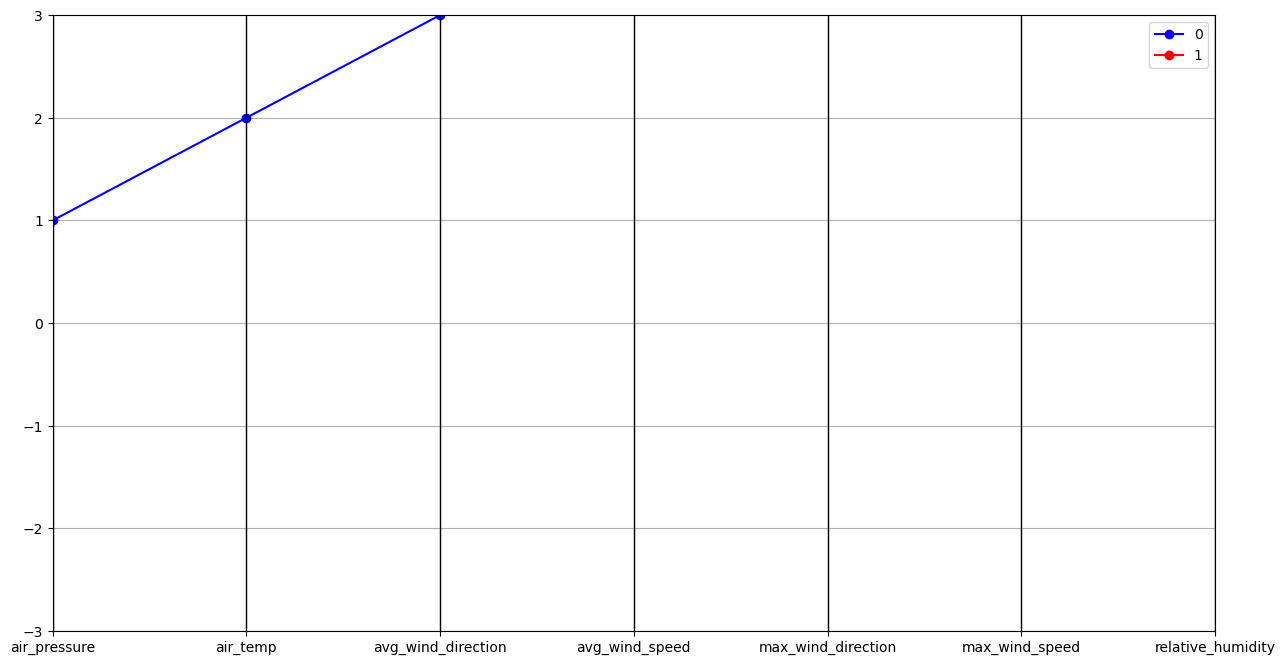

In [37]:
# Assuming 'features' and 'centers' are defined earlier in your script
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 'max_wind_speed', 'relative_humidity']
centers = [[1, 2, 3, 4, 5, 6, 7], [8, 9, 10, 11, 12, 13, 14]]  # Example centers data

# Create DataFrame with cluster centers
P = pd_centers(features, centers)
print("pd_centers: ", P)

# Create parallel coordinate plots
parallel_plot(P)

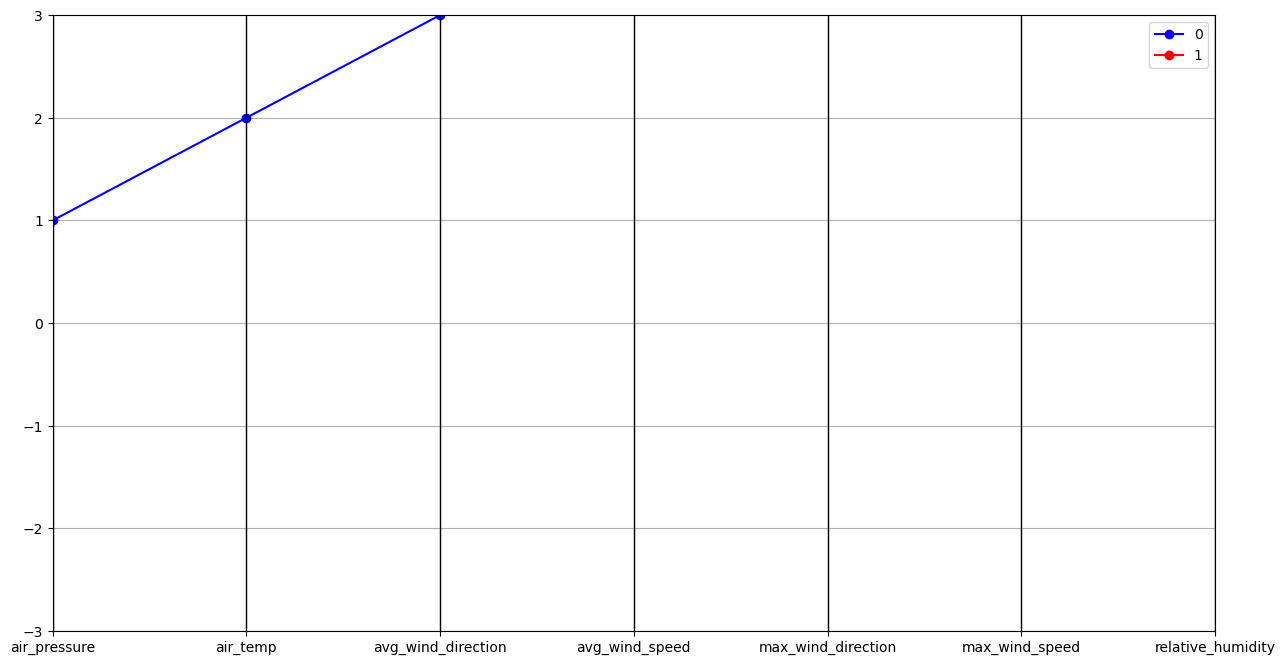

In [39]:
parallel_plot(P[P["air_temp"] > 0.5])

ValueError: Invalid color argument: []

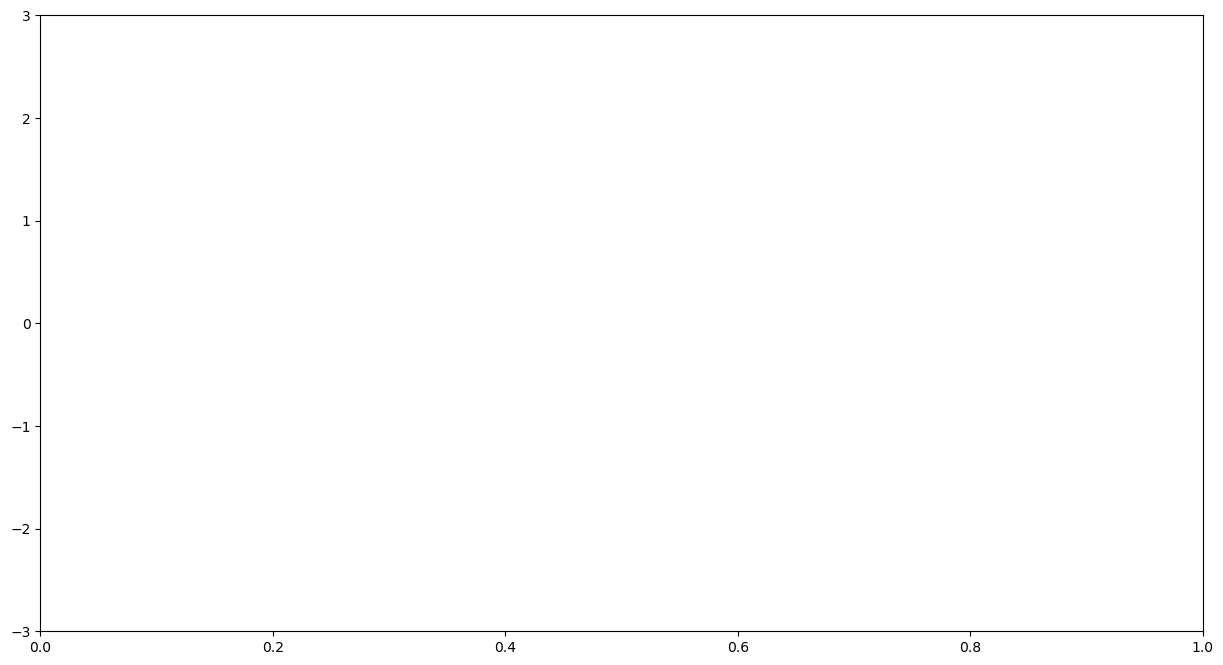

In [43]:
# Create parallel coordinate plot for subset of data points
cool_days_subset = P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)]
parallel_plot(cool_days_subset)


In [44]:
print(cool_days_subset)
print("Shape of cool_days_subset:", cool_days_subset.shape)


Empty DataFrame
Columns: [air_pressure, air_temp, avg_wind_direction, avg_wind_speed, max_wind_direction, max_wind_speed, relative_humidity, prediction]
Index: []
Shape of cool_days_subset: (0, 8)
